In [1]:
import pandas as pd

In [4]:
df_raw = pd.read_csv('200511COVID19MEXICO.csv', encoding = 'latin1')

In [5]:
df_raw.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [6]:
df_sonora = df_raw.query("ENTIDAD_RES == 26 and RESULTADO == 1 and FECHA_DEF != '9999-99-99' ")[['FECHA_SINTOMAS','FECHA_INGRESO', 'FECHA_DEF']].groupby(['FECHA_SINTOMAS','FECHA_INGRESO']).count()

In [7]:
df_sonora

FECHA_DEF
FECHA_SINTOMAS FECHA_INGRESO           
2020-03-20     2020-03-25             1
2020-03-22     2020-03-28             1
2020-03-24     2020-03-24             1
2020-03-27     2020-03-27             1
               2020-04-10             1
2020-03-28     2020-04-01             1
               2020-04-02             1
2020-03-30     2020-04-02             1
2020-03-31     2020-04-04             1
2020-04-01     2020-04-04             1
               2020-04-06             1
2020-04-03     2020-04-06             1
2020-04-04     2020-04-09             1
2020-04-06     2020-04-09             1
2020-04-08     2020-04-14             1
2020-04-09     2020-04-16             2
2020-04-10     2020-04-12             1
               2020-04-13             1
2020-04-11     2020-04-15             1
               2020-04-18             1
2020-04-13     2020-04-13             1
               2020-04-18             1
2020-04-14     2020-04-18             1
               2020-04-21             1
2020-04-16     2020-04-19             1
               2020-04-22             1
2020-04-18     2020-04-21             1
2020-04-20     2020-04-27             1
2020-04-23     2020-04-27             1
2020-04-27     2020-04-27             1
2020-04-30     2020-04-30             1
2020-05-01     2020-05-02             1

In [8]:
df_sonora.rename(columns={'FECHA_DEF':'DECESOS'}, inplace=True)

In [9]:
df_sonora.to_csv("tabla1.csv")

In [10]:
df_SCNP = df_raw.query("ENTIDAD_RES == [8,19,21,26] and TIPO_PACIENTE == 2")[['ENTIDAD_RES','TIPO_PACIENTE']].groupby(['ENTIDAD_RES']).count()

In [11]:
df_SCNP.index = df_SCNP.index.map({8:'Chichuahua', 19:'Nuevo Leon', 21:'Puebla', 26:'Sonora'})

In [12]:
df_SCNP.rename(columns={'TIPO_PACIENTE':'HOSPITALIZADOS'}, inplace=True)

In [13]:
df_SCNP

,HOSPITALIZADOS
ENTIDAD_RES,
Chichuahua,1013
Nuevo Leon,1065
Puebla,1295
Sonora,604


In [14]:
df_SCNP.to_csv("tabla2.csv")

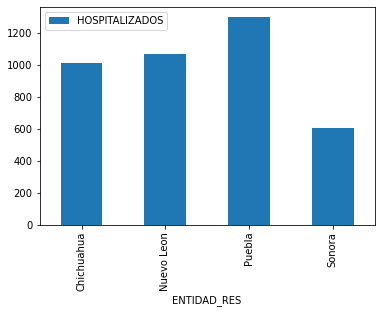

In [15]:
Grafica1 = df_SCNP.plot.bar()

In [16]:
Grafica1.get_figure().savefig('Grafica1.png')

In [17]:
df_tiempo = df_raw.query("RESULTADO == 1")[['FECHA_SINTOMAS','RESULTADO']].groupby(['FECHA_SINTOMAS']).count()

In [18]:
df_tiempo.rename(columns={'RESULTADO':'CASOS_CONFIRMADOS'}, inplace=True)

In [19]:
df_tiempo

,CASOS_CONFIRMADOS
FECHA_SINTOMAS,
2020-01-08,1
2020-01-14,1
2020-01-17,1
2020-01-28,1
2020-01-30,1
...,...
2020-05-06,348
2020-05-07,181
2020-05-08,97


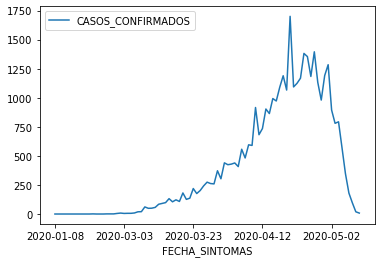

In [20]:
Grafica2 = df_tiempo.plot.line()

In [21]:
Grafica2.get_figure().savefig('Grafica2.png')